<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install sklearn pandas

In [3]:
import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=3, average='micro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [5]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(60, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add( Dense(10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

In [9]:
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                5100      
                                                                 
 dense_1 (Dense)             (None, 10)                610       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 5,743
Trainable params: 5,743
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 580, epochs = 5000,  validation_split=0.2)

Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 8ms/step - loss: 0.8459 - accuracy: 0.5733 - val_loss: 1.2051 - val_accuracy: 0.4411
Epoch 2502/5000
34/34 [==============================] - 0s 8ms/step - loss: 0.8448 - accuracy: 0.5764 - val_loss: 1.1097 - val_accuracy: 0.4946
Epoch 2503/5000
34/34 [==============================] - 0s 8ms/step - loss: 0.8462 - accuracy: 0.5730 - val_loss: 1.3825 - val_accuracy: 0.3887
Epoch 2504/5000
34/34 [==============================] - 0s 10ms/step - loss: 0.8448 - accuracy: 0.5730 - val_loss: 1.0385 - val_accuracy: 0.5370
Epoch 2505/5000
34/34 [==============================] - 0s 8ms/step - loss: 0.8469 - accuracy: 0.5730 - val_loss: 1.4250 - val_accuracy: 0.3646
Epoch 2506/5000
34/34 [==============================] - 0s 8ms/step - loss: 0.8462 - accuracy: 0.5725 - val_loss: 1.1313 - val_accuracy: 0.5011
Epoch 2507/5000
34/34 [==============================] - 0s 9ms/step - loss: 0.8464 - accuracy

In [12]:
import matplotlib.pyplot as plt

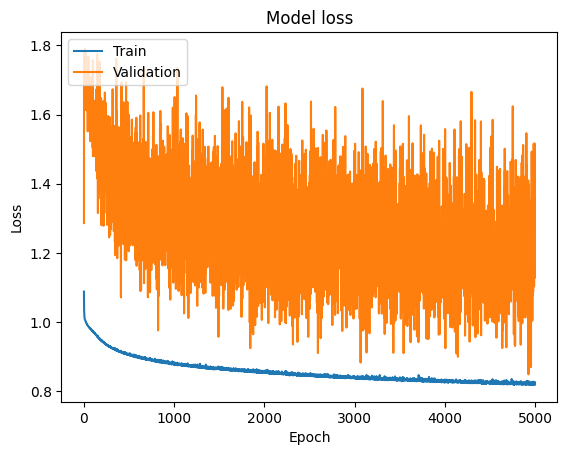

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

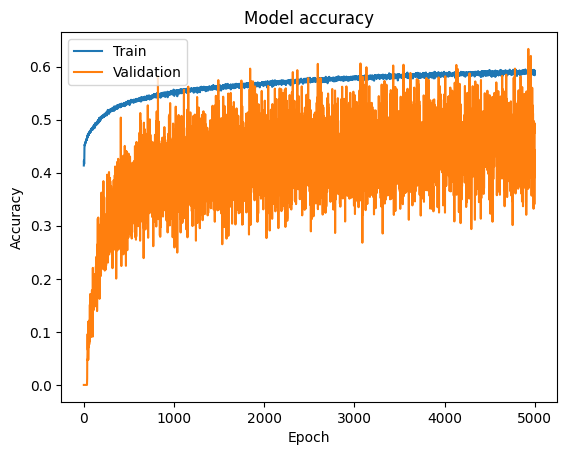

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 1.1738 - accuracy: 0.4352
[1.173798680305481, 0.43520957231521606]
131/131 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.54      0.53      0.53      2042
     class 1       0.31      0.35      0.33      1327
     class 2       0.41      0.33      0.36       806

    accuracy                           0.44      4175
   macro avg       0.42      0.40      0.41      4175
weighted avg       0.44      0.44      0.44      4175



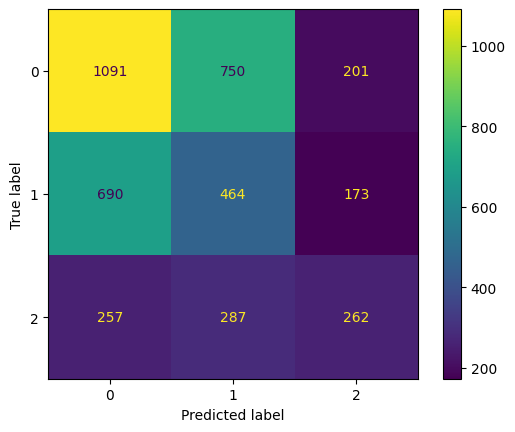



*********************************************
Train-set evaluate result:

766/766 [==============================] - 1s 2ms/step - loss: 0.8791 - accuracy: 0.5717
[0.879121720790863, 0.5716968774795532]
766/766 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.53      0.65      0.58      8164
     class 1       0.50      0.59      0.54      8164
     class 2       0.80      0.47      0.59      8164

    accuracy                           0.57     24492
   macro avg       0.61      0.57      0.57     24492
weighted avg       0.61      0.57      0.57     24492



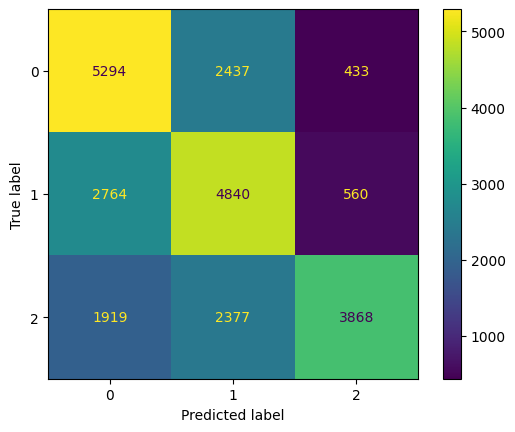

In [15]:
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 0s 2ms/step - loss: 1.1738 - accuracy: 0.4352


In [17]:
model.save("/content/drive/MyDrive/new_df/best_model_by_3classes")